# Title: Prediction of whether a candidates star is a Pulsar or not

## Section 1: Introduction

#### Background Information About Pulsars
Pulsars are rotating neutron stars that emit beams of electromagnetic radiation that is detectable on Earth [2]. Scientists use pulsars to investigate state of matter, use them as accurate natural clocks, measure distance of cosmic objects, and even use them to test the universal force of gravity [3]. Machine learning classifiers are used in studying and labelling of pulsar candidates for an efficient analysis. In particular, the binary classification system is commonly used [1]. 


#### About Our Project
In this project, we are using classification method, which is predicting a categorical class of observations, to answer the question: 
>Is the observed star a pulsar star or not?


#### About Datasets
We have two datasets, one is a training dataset, the other one is a testing dataset. The testing dataset contains 5,370 candidates of pulsar, which will help us test the performance of our model. Since each pulsar produces slightly different emission patterns as they rotate, so each candidate's data is averaged over many rotations of the pulsar [1]. Each candidate in both datasets is described by 8 continuous variables, and a single class variable. The first four statistics obtained from integrated pulsar profile, which describe a longitude-resolved version of the signal that has been averaged in both time and frequency [1]. Variables 5 to 8 are obtained from the DM-SNR curve, where DM is a measure of dispersion signal received and SNR is the signal-to-noise ratio [1]. The last variable indicates the class of the candidate. 
 
1. Mean of the integrated profile - the average
2. Standard deviation of the integrated profile - a summary measure of the differences of observations from the mean
3. Excess kurtosis of the integrated profile - a measure to compare the tail with normal distribution
4. Skewness of the integrated profile - a measure of the degree of symmetry
5. Mean of the DM-SNR curve - the average
6. Standard deviation of the DM-SNR curve - a summary measure of the differences of observations from the mean
7. Excess kurtosis of the DM-SNR curve - a measure to compare the tail with normal distribution
8. Skewness of the DM-SNR curve - a measure of the degree of symmetry
9. Class


#### References
[1] Lyon, R. J., Stappers, B. W., Cooper, S., Brooke, J. M., &amp; Knowles, J. D. (2016). *Fifty Years of pulsar candidate selection: From simple filters to a new principled real-time classification approach.* Monthly Notices of the Royal Astronomical Society, 459(1), 1104–1123. https://doi.org/10.1093/mnras/stw656. \
[2] Wikimedia Foundation. (2021, October 22). *Pulsar.* Wikipedia. Retrieved November 6, 2021, from https://en.wikipedia.org/wiki/Pulsar. \
[3] Cofield, C.(2016, April 22). *What are pulsars?* Space.com. Retrieved November 6, 2021, from https://www.space.com/32661-pulsars.html. 


## Section 2: Preliminary exploratory data analysis


In [1]:
# Load library
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



#### ～Reading Data into R

In [17]:
pulsar_train <- read_csv("https://raw.githubusercontent.com/ScottCY/Group-_Project/main/pulsar_data_train.csv")
head(pulsar_train)
pulsar_test <- read_csv("https://raw.githubusercontent.com/ScottCY/Group-_Project/main/pulsar_data_test.csv")
head(pulsar_test)
nrow(pulsar_test)

Parsed with column specification:
cols(
  `Mean of the integrated profile` = col_double(),
  `Standard deviation of the integrated profile` = col_double(),
  `Excess kurtosis of the integrated profile` = col_double(),
  `Skewness of the integrated profile` = col_double(),
  `Mean of the DM-SNR curve` = col_double(),
  `Standard deviation of the DM-SNR curve` = col_double(),
  `Excess kurtosis of the DM-SNR curve` = col_double(),
  `Skewness of the DM-SNR curve` = col_double(),
  target_class = col_double()
)



Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
121.15625,48.37297,0.3754847,-0.01316549,3.168896,18.39937,7.449874,65.159298,0
76.96875,36.17556,0.7128979,3.38871856,2.399666,17.57100,9.414652,102.722975,0
130.58594,53.22953,0.1334083,-0.29724164,2.743311,22.36255,8.508364,74.031324,0
156.39844,48.86594,-0.2159886,-0.17129365,17.471572,NA,2.958066,7.197842,0
84.80469,36.11766,0.8250128,3.27412537,2.790134,20.61801,8.405008,76.291128,0
121.00781,47.17694,0.2297081,0.09133623,2.036789,NA,9.546051,112.131721,0


Parsed with column specification:
cols(
  `Mean of the integrated profile` = col_double(),
  `Standard deviation of the integrated profile` = col_double(),
  `Excess kurtosis of the integrated profile` = col_double(),
  `Skewness of the integrated profile` = col_double(),
  `Mean of the DM-SNR curve` = col_double(),
  `Standard deviation of the DM-SNR curve` = col_double(),
  `Excess kurtosis of the DM-SNR curve` = col_double(),
  `Skewness of the DM-SNR curve` = col_double(),
  target_class = col_logical()
)



Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
116.90625,48.92060,0.1860463,-0.1298151,3.037625,17.73710,8.1226208,78.813405,NA
75.58594,34.38625,2.0254984,8.6529130,3.765050,21.89705,7.0481886,55.878791,NA
103.27344,46.99663,0.5042952,0.8210883,2.244983,15.62257,9.3304985,105.134942,NA
101.07812,48.58749,1.0114270,1.1518699,81.887960,81.46414,0.4851051,-1.117904,NA
113.22656,48.60880,0.2915380,0.2921203,6.291806,26.58506,4.5401376,21.708268,NA
85.47656,38.05279,NA,1.9150973,2.637124,NA,9.0015001,NA,NA


[1] 5370

#### ～Tidy Format

By looking at the data itself, it is already a tidy format since each row represents one observation, each column is a single variable and each value is in a single cell. But to make the data more concise and readable, we choose to rename the column names to make it stay in a single line. Also, we change the category of target_class to factor since it can only be 0 or 1.

In [3]:
pulsar_train_tidy <- rename(pulsar_train, integrated_profile_mean = `Mean of the integrated profile`,
                                integrated_profile_standard_deviation = `Standard deviation of the integrated profile`,
                                 integrated_profile_kurtosis = `Excess kurtosis of the integrated profile`,
                                 integrated_profile_skewness = `Skewness of the integrated profile`,
                                 DMSNR_curve_mean = `Mean of the DM-SNR curve`,
                                 DMSNR_curve_standard_deviation = `Standard deviation of the DM-SNR curve`,
                                 DMSNR_curve_kurtosis = `Excess kurtosis of the DM-SNR curve`,
                                 DMSNR_curve_skewness = `Skewness of the DM-SNR curve`) %>%
                     mutate(target_class = as_factor(target_class))
pulsar_test_tidy <- rename(pulsar_test, integrated_profile_mean = `Mean of the integrated profile`,
                                integrated_profile_standard_deviation = `Standard deviation of the integrated profile`,
                                 integrated_profile_kurtosis = `Excess kurtosis of the integrated profile`,
                                 integrated_profile_skewness = `Skewness of the integrated profile`,
                                 DMSNR_curve_mean = `Mean of the DM-SNR curve`,
                                 DMSNR_curve_standard_deviation = `Standard deviation of the DM-SNR curve`,
                                 DMSNR_curve_kurtosis = `Excess kurtosis of the DM-SNR curve`,
                                 DMSNR_curve_skewness = `Skewness of the DM-SNR curve`) %>%
                      mutate(target_class = as_factor(target_class))


head(pulsar_train_tidy)  
head(pulsar_test_tidy)

integrated_profile_mean,integrated_profile_standard_deviation,integrated_profile_kurtosis,integrated_profile_skewness,DMSNR_curve_mean,DMSNR_curve_standard_deviation,DMSNR_curve_kurtosis,DMSNR_curve_skewness,target_class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
121.15625,48.37297,0.3754847,-0.01316549,3.168896,18.39937,7.449874,65.159298,0
76.96875,36.17556,0.7128979,3.38871856,2.399666,17.57100,9.414652,102.722975,0
130.58594,53.22953,0.1334083,-0.29724164,2.743311,22.36255,8.508364,74.031324,0
156.39844,48.86594,-0.2159886,-0.17129365,17.471572,NA,2.958066,7.197842,0
84.80469,36.11766,0.8250128,3.27412537,2.790134,20.61801,8.405008,76.291128,0
121.00781,47.17694,0.2297081,0.09133623,2.036789,NA,9.546051,112.131721,0


integrated_profile_mean,integrated_profile_standard_deviation,integrated_profile_kurtosis,integrated_profile_skewness,DMSNR_curve_mean,DMSNR_curve_standard_deviation,DMSNR_curve_kurtosis,DMSNR_curve_skewness,target_class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
116.90625,48.92060,0.1860463,-0.1298151,3.037625,17.73710,8.1226208,78.813405,NA
75.58594,34.38625,2.0254984,8.6529130,3.765050,21.89705,7.0481886,55.878791,NA
103.27344,46.99663,0.5042952,0.8210883,2.244983,15.62257,9.3304985,105.134942,NA
101.07812,48.58749,1.0114270,1.1518699,81.887960,81.46414,0.4851051,-1.117904,NA
113.22656,48.60880,0.2915380,0.2921203,6.291806,26.58506,4.5401376,21.708268,NA
85.47656,38.05279,NA,1.9150973,2.637124,NA,9.0015001,NA,NA


#### ～Summarize the data 

For summary section, we choose to make two tables, one used to summarize the information we could get from all the predictors and the other for summarizing the given target_class in training set.

* Table 1

In [4]:
# Gather necessary summary in this cell
Col1 <- pulsar_train_tidy$integrated_profile_mean
Col2 <- pulsar_train_tidy$integrated_profile_standard_deviation
Col3 <- pulsar_train_tidy$integrated_profile_kurtosis
Col4 <- pulsar_train_tidy$integrated_profile_skewness
Col5 <- pulsar_train_tidy$DMSNR_curve_mean
Col6 <- pulsar_train_tidy$DMSNR_curve_standard_deviation
Col7 <- pulsar_train_tidy$DMSNR_curve_kurtosis
Col8 <- pulsar_train_tidy$DMSNR_curve_skewness

summary_column1 <- summary(Col1, na.rm = TRUE)
summary_column2 <- summary(Col2, na.rm = TRUE)
summary_column3 <- summary(Col3, na.rm = TRUE)
summary_column4 <- summary(Col4, na.rm = TRUE)
summary_column5 <- summary(Col5, na.rm = TRUE)
summary_column6 <- summary(Col6, na.rm = TRUE)
summary_column7 <- summary(Col7, na.rm = TRUE)
summary_column8 <- summary(Col8, na.rm = TRUE)

na_C1 <- sum(is.na(Col1))
na_C2 <- sum(is.na(Col2))
na_C3 <- sum(is.na(Col3))
na_C4 <- sum(is.na(Col4))
na_C5 <- sum(is.na(Col5))
na_C6 <- sum(is.na(Col6))
na_C7 <- sum(is.na(Col7))
na_C8 <- sum(is.na(Col8))

n_observation <- nrow(pulsar_train_tidy) 

In [5]:
# Create summary table for predictor here

#create a data.frame for summary information
row_part1 <- data.frame(rbind(summary_column1,summary_column2, summary_column4, summary_column5 ,summary_column7))
row_part2 <- select(data.frame(rbind(summary_column3,summary_column6,summary_column8)), -NA.s)
predictors_summary <- rbind(row_part1, row_part2)

predictors_table <- setNames(cbind(rownames(predictors_summary), predictors_summary, row.names = NULL), 
         c("data_type", "Minimun", "Q1(25% percentile)",
           "Median", "Mean", "Q3(75% percentile)", "Maximun")) %>% #Add name to first column
         mutate(n = c(1,2,4,5,7,3,6,8)) %>%
         arrange(n) %>%
         mutate(data_type = c("integrated_profile_mean","integrated_profile_standard_deviation","integrated_profile_kurtosis",
                              "integrated_profile_skewness","DMSNR_curve_mean","DMSNR_curve_standard_deviation",
                              "DMSNR_curve_kurtosis","DMSNR_curve_skewness")) %>%
         mutate(number_of_NA = c(na_C1,na_C2,na_C3,na_C4,na_C5,na_C6,na_C7,na_C8)) %>%  #add NA information
         mutate(number_of_data = c(n_observation)) %>% #add number of observations
         select(-n) #remove useless column
predictors_table

data_type,Minimun,Q1(25% percentile),Median,Mean,Q3(75% percentile),Maximun,number_of_NA,number_of_data
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
integrated_profile_mean,5.8125000,100.87109375,115.183594,111.0418413,127.1093750,189.734375,0,12528
integrated_profile_standard_deviation,24.7720418,42.36222228,46.931022,46.5214373,50.9791025,91.808628,0,12528
integrated_profile_kurtosis,-1.7380208,0.02465239,0.223678,0.4785477,0.4731246,8.069522,1735,12528
integrated_profile_skewness,-1.7918860,-0.18814176,0.203317,1.7784311,0.9323738,68.101622,0,12528
DMSNR_curve_mean,0.2132107,1.91053512,2.792642,12.6747578,5.4132525,222.421405,0,12528
DMSNR_curve_standard_deviation,7.3704322,14.40435324,18.412402,26.3513182,28.3374185,110.642211,1178,12528
DMSNR_curve_kurtosis,-3.1392696,5.80306338,8.451097,8.3334891,10.7279272,34.539844,0,12528
DMSNR_curve_skewness,-1.9769756,35.19989860,83.126301,105.5257790,139.9978498,1191.000837,625,12528


As we have quantatative data to determine whether it is pulsar, we choose to use the 5 number summary, which dipicts the data. Also, we include the number of NAs in each cell and total observations we have, which provides a clear overview of the data.

* Table 2

In [9]:
#Get table for information about Target class
class_table <- group_by(pulsar_train_tidy, target_class) %>%
               summarize(count=n())
name <- c("non-pulsar", "pulsar")
class_table$type <- name
class_table

`summarise()` ungrouping output (override with `.groups` argument)



target_class,count,type
<fct>,<int>,<chr>
0,11375,non-pulsar
1,1153,pulsar


From this table, we can see that in training set, the number of non_pulsar is much more than the pulsar, which reminds us that we needs to also set the same proprotion as here when doing cross_validation later in data analysis.

#### ~Visualize the data

* Plot 1

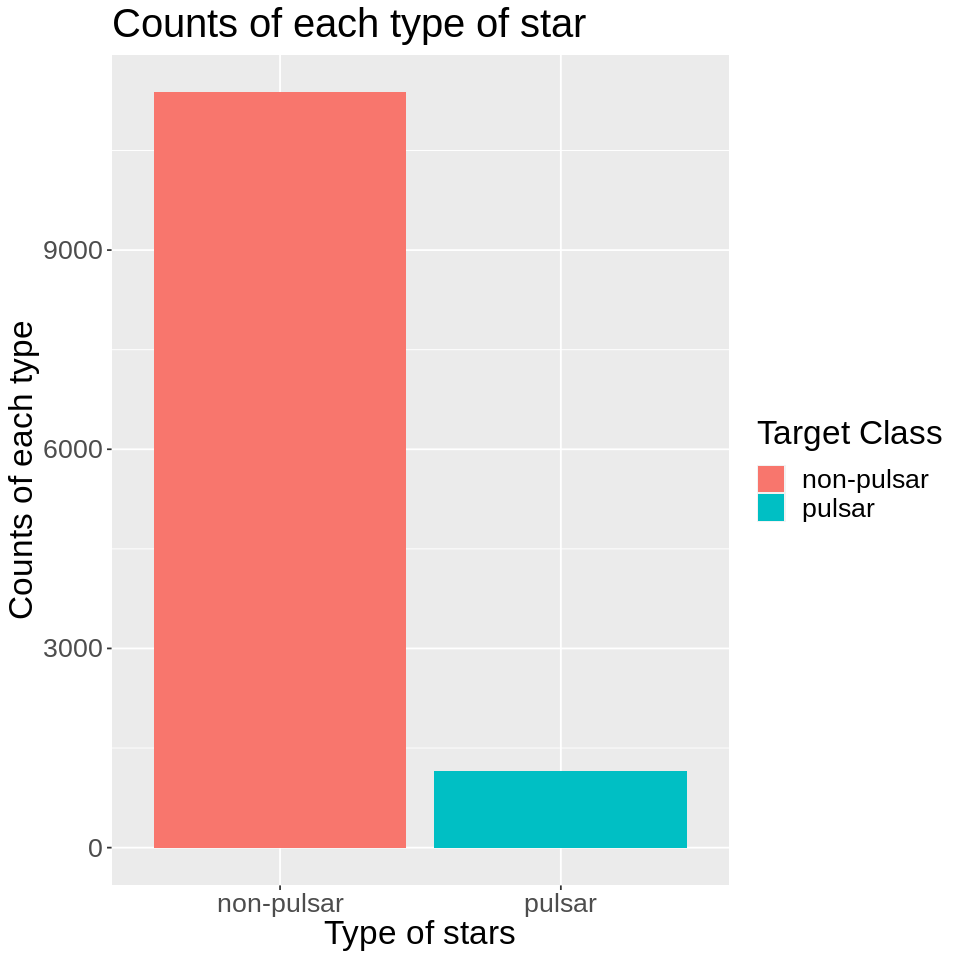

In [10]:
#Visualize our data (counts of each type of star)
#The chart below visualizes the table above, about the number of pulsar and non-pulsar star, 
#which clearly reveals that there is much more pulsar stars in this data set.
options(repr.plot.width = 8, repr.plot.height = 8) 
Class_counts_chart <- ggplot(class_table, aes(x = type, y = count, fill = type))+
geom_bar(stat = "identity")+
ggtitle("Counts of each type of star")+
labs(x = "Type of stars", y = "Counts of each type", fill = "Target Class")+
theme(text = element_text(size = 20))
Class_counts_chart

* Plot 2

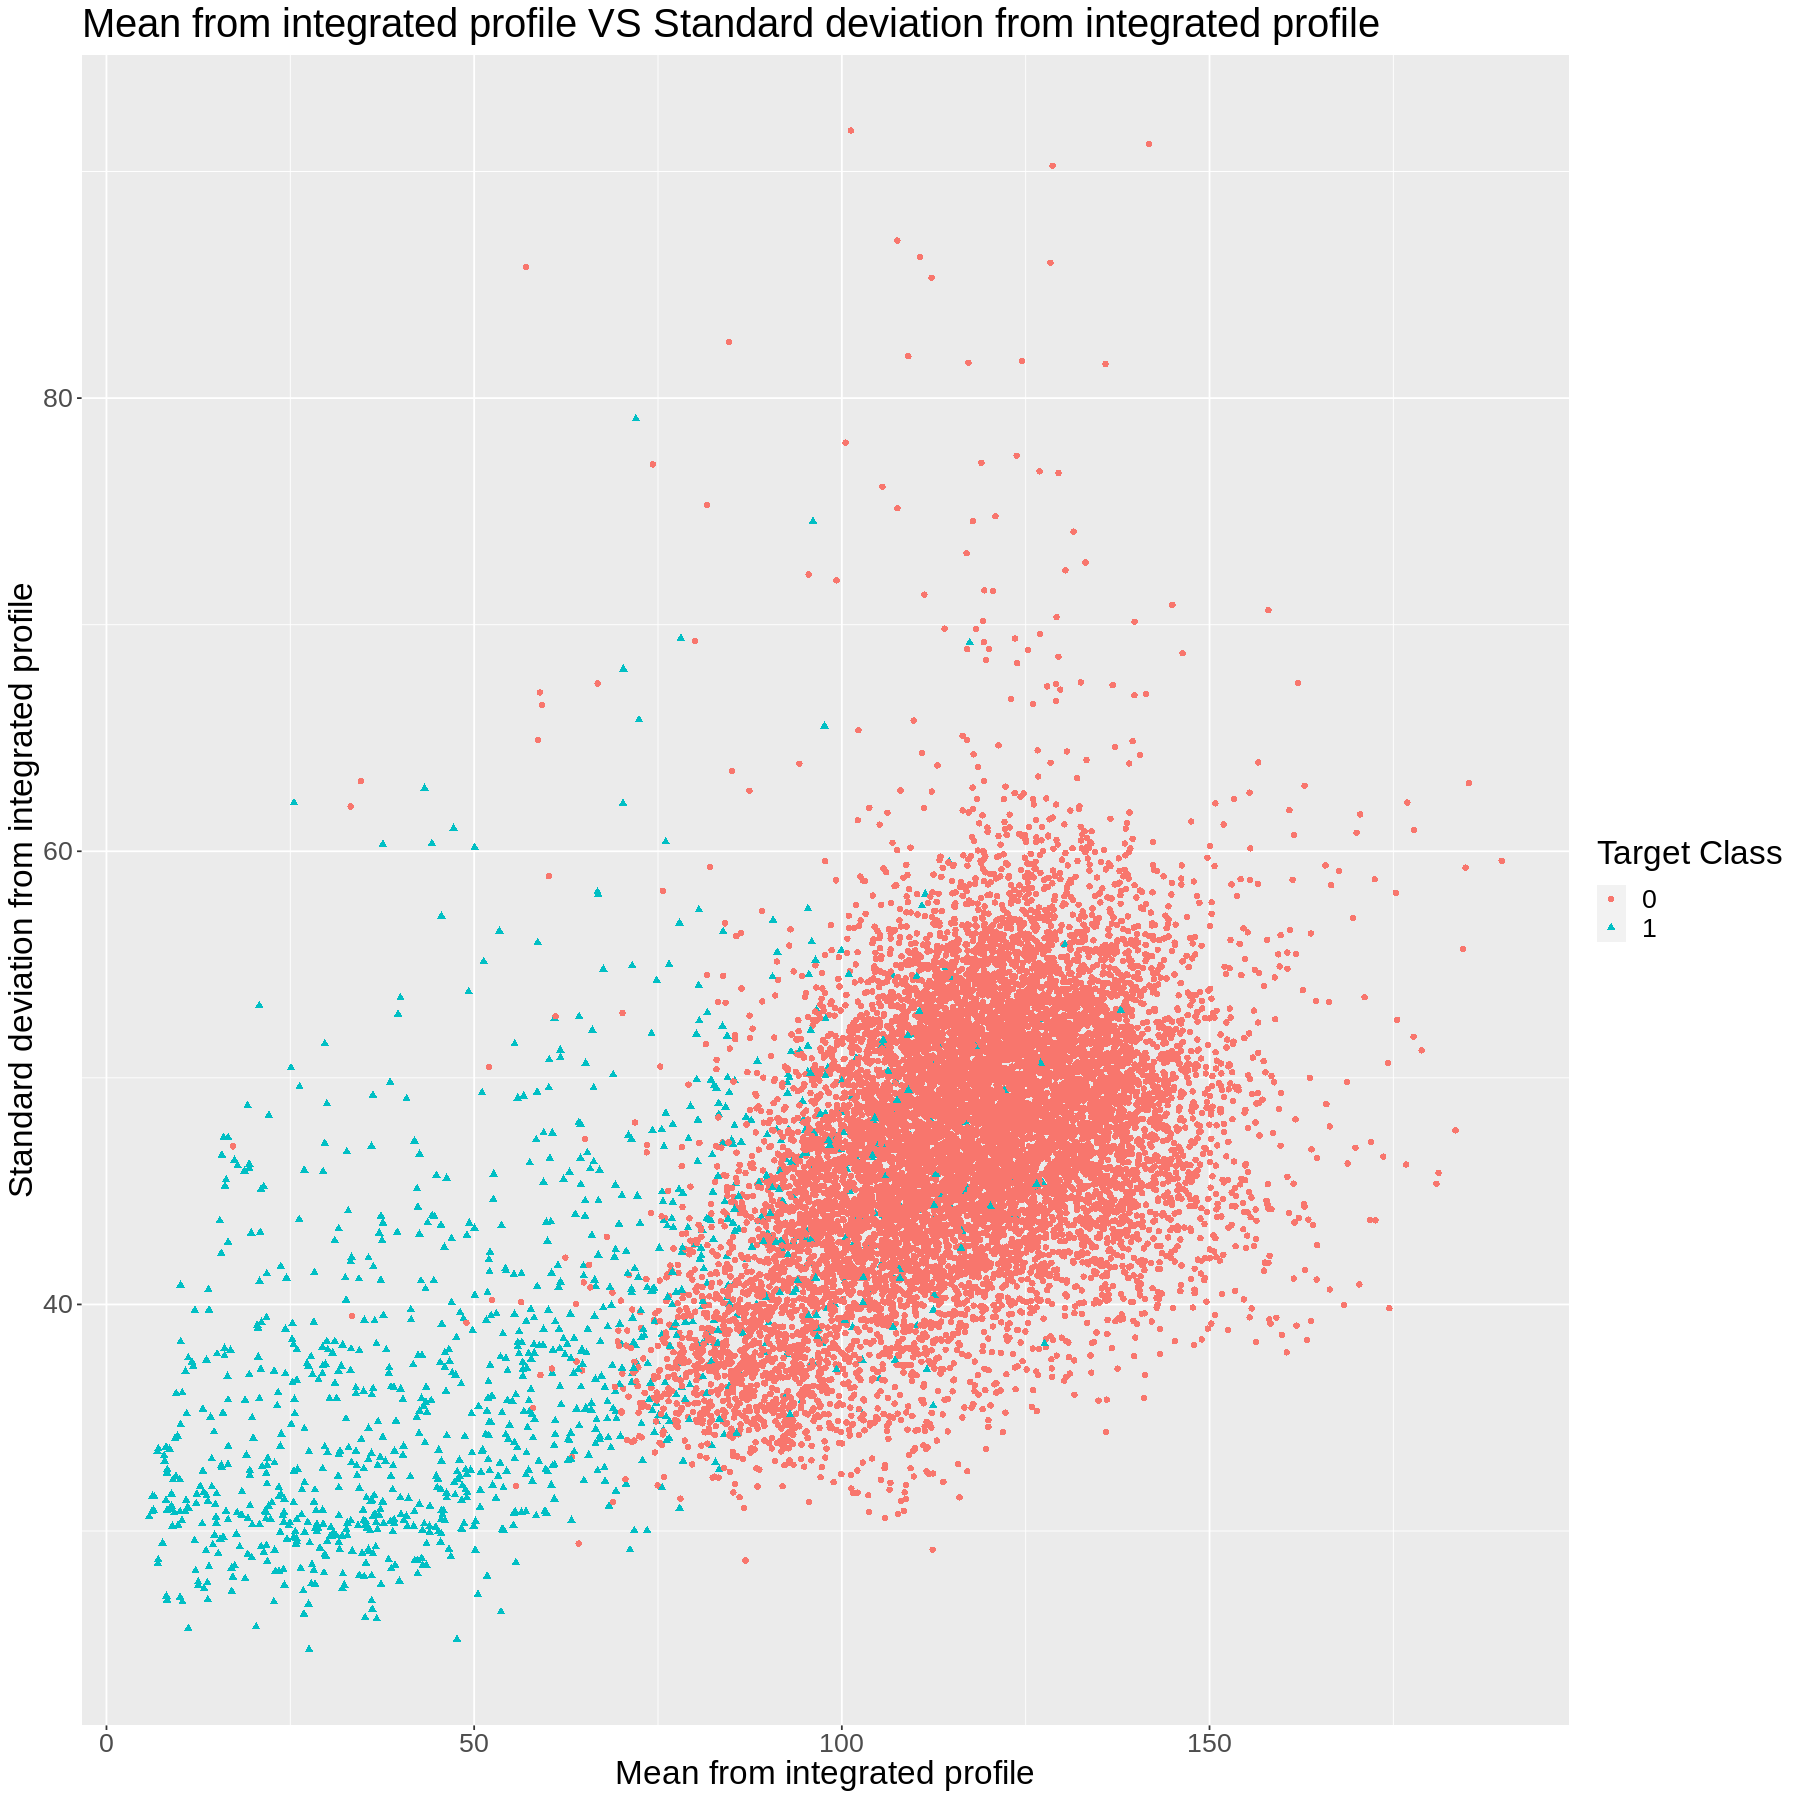

In [11]:
#Visualize our data (scatterplot of the two class of star from their integrated profile)
#The scatterplot demonstrates the distribution of the two types of star, 
#which we can see that non-pulsar stars have higher mean values than pulsar stars from integrated profile.
options(repr.plot.width = 15, repr.plot.height = 15)
Integrated_profile_plot <- ggplot(pulsar_train_tidy, 
            aes(x = integrated_profile_mean, y = integrated_profile_standard_deviation, colour = target_class, shape = target_class))+
geom_point()+
ggtitle("Mean from integrated profile VS Standard deviation from integrated profile")+
labs(x = "Mean from integrated profile", y = "Standard deviation from integrated profile", colour = "Target Class", shape = "Target Class")+
theme(text = element_text(size = 20))
         Integrated_profile_plot                       

Warning message:
“Removed 1735 rows containing missing values (geom_point).”


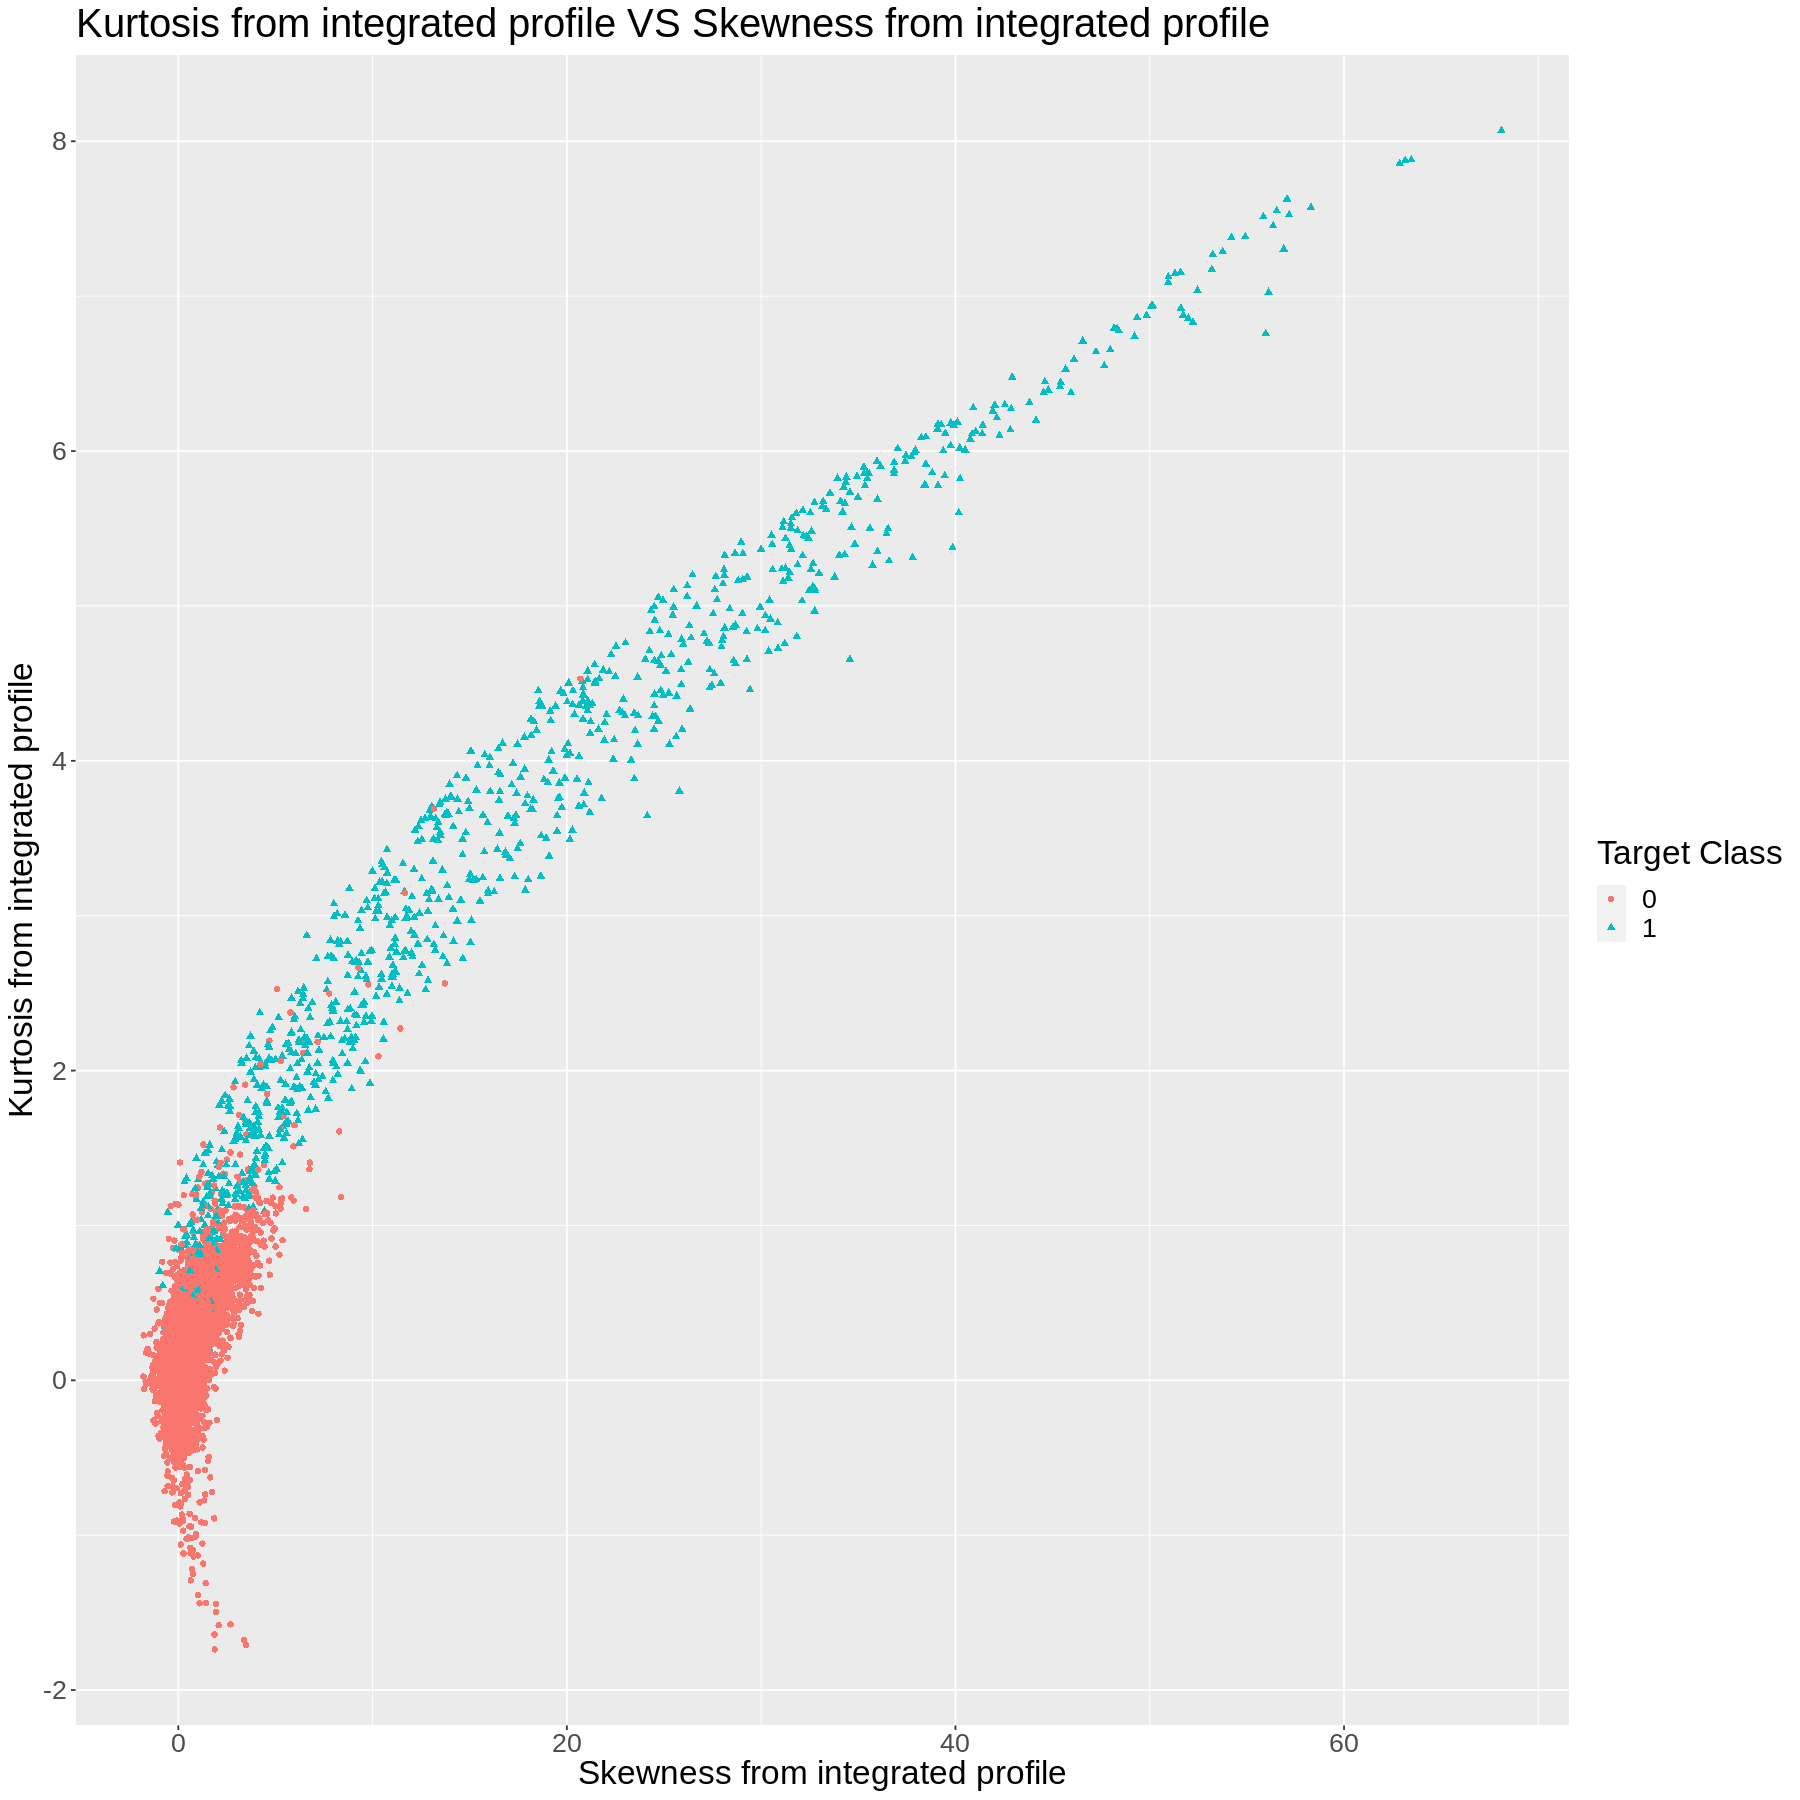

In [12]:
options(repr.plot.width = 15, repr.plot.height = 15)
Integrated_profile_plot_2 <- ggplot(pulsar_train_tidy, 
            aes(x = integrated_profile_skewness, y = integrated_profile_kurtosis, colour = target_class, shape = target_class))+
geom_point()+
ggtitle("Kurtosis from integrated profile VS Skewness from integrated profile")+
labs(x = "Skewness from integrated profile", y = "Kurtosis from integrated profile", colour = "Target Class", shape = "Target Class")+
theme(text = element_text(size = 20))
         Integrated_profile_plot_2                       

* Plot 3

Warning message:
“Removed 1178 rows containing missing values (geom_point).”


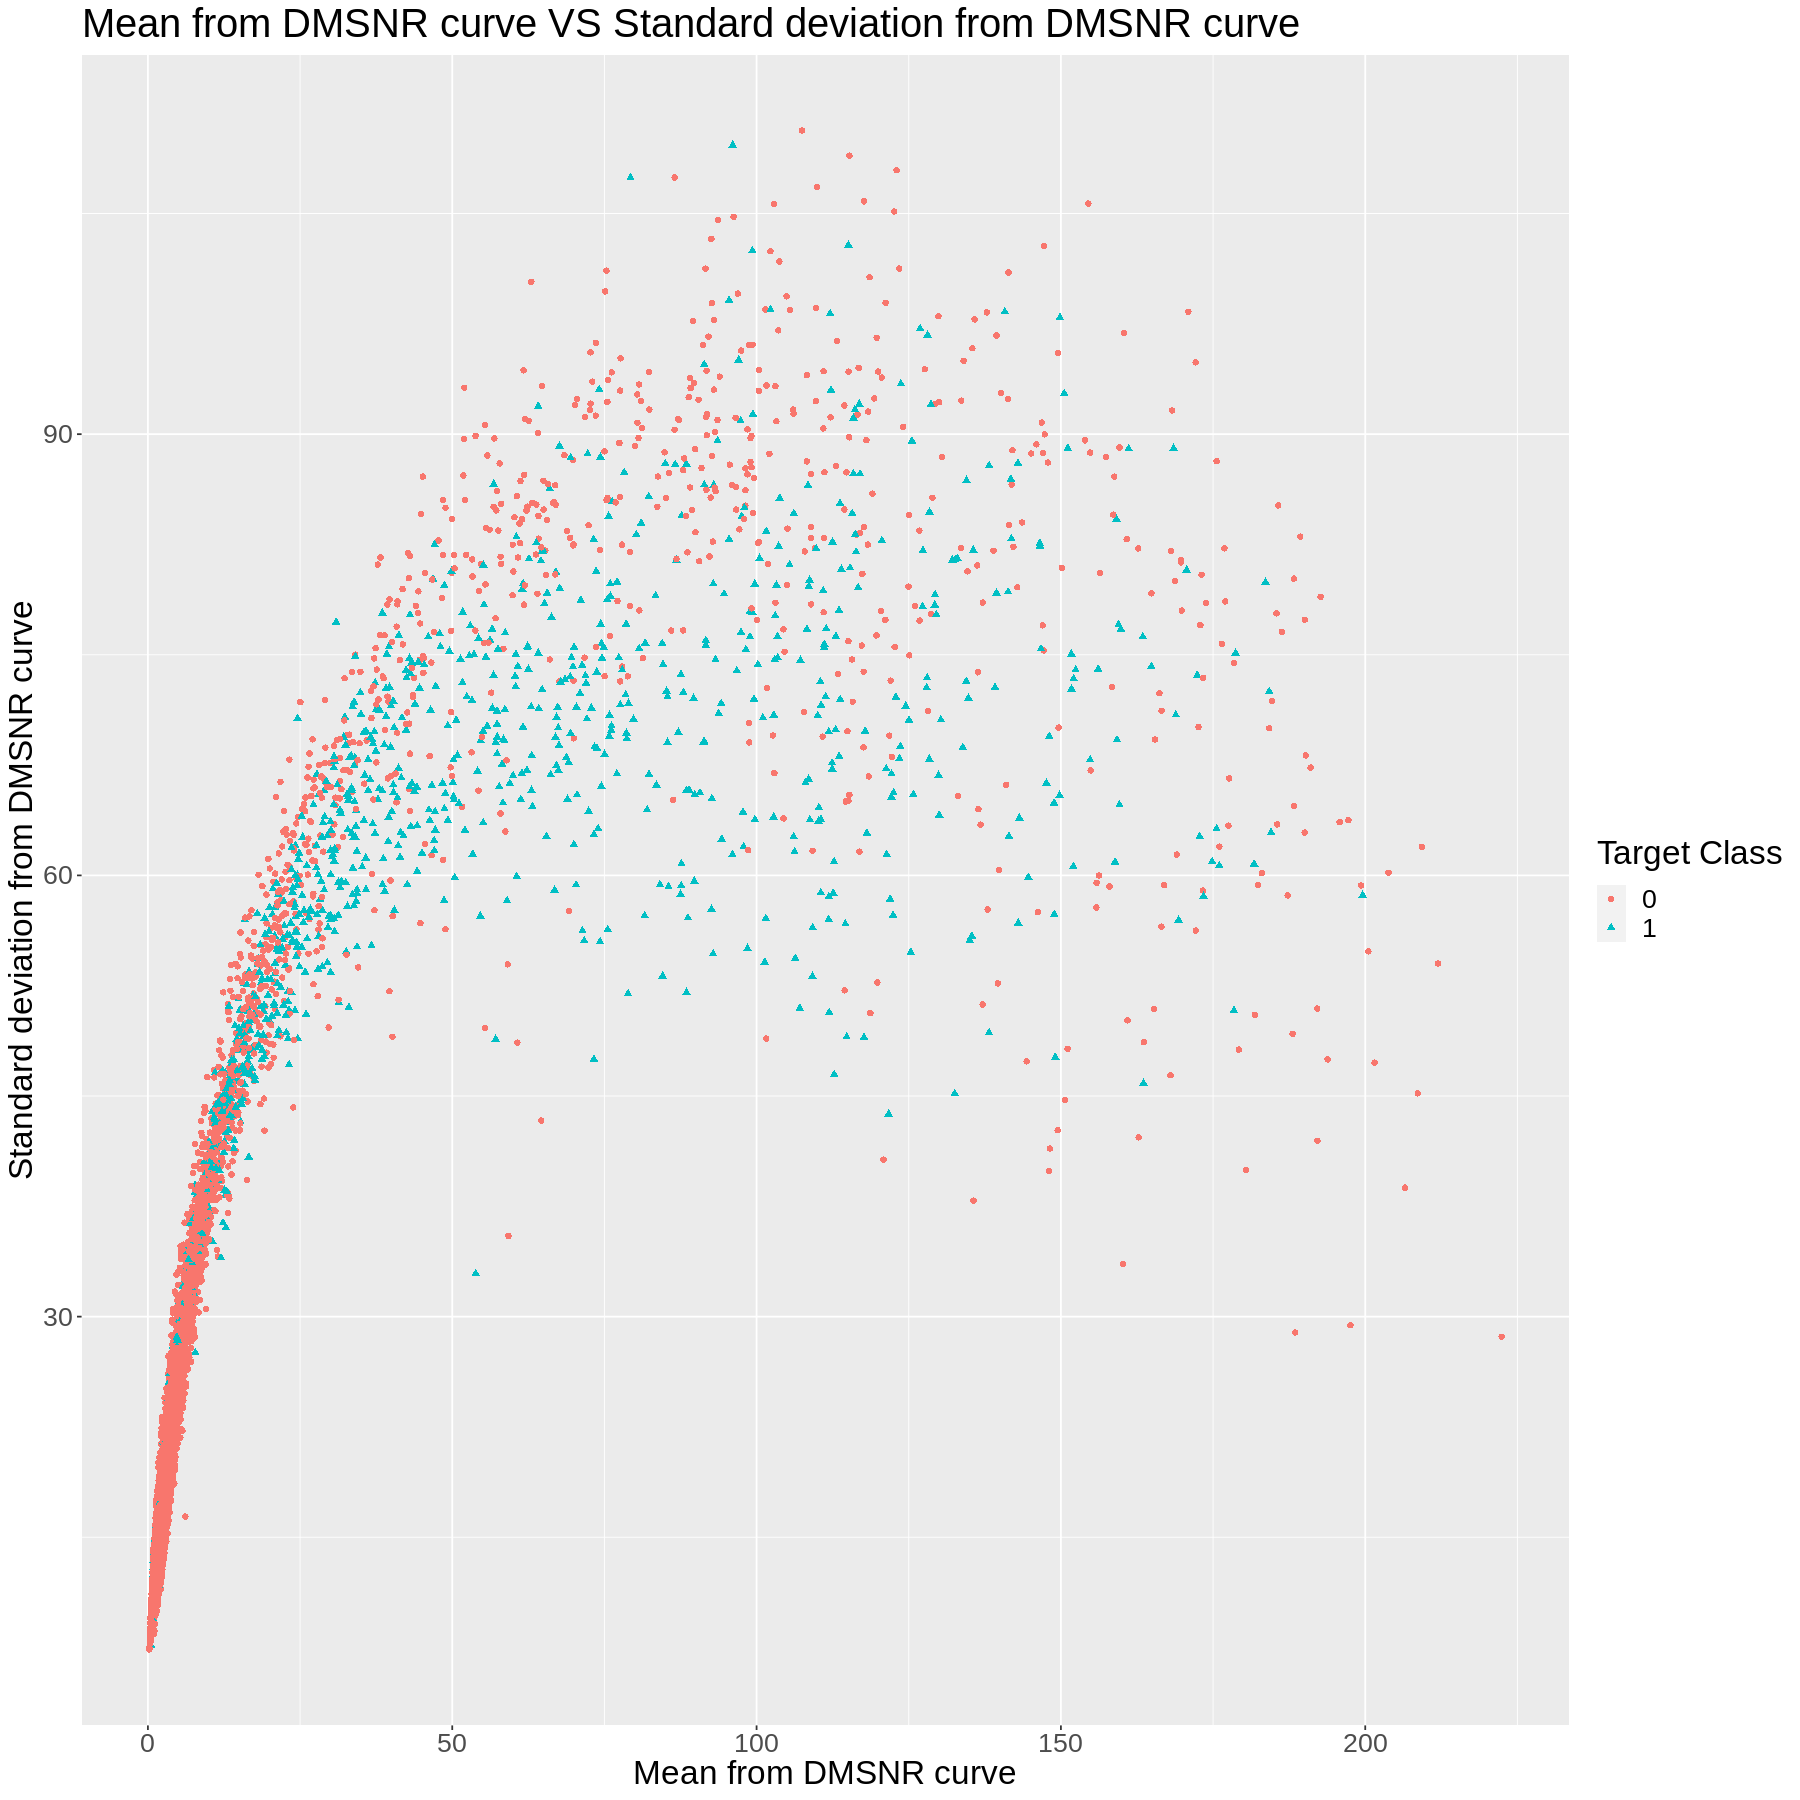

In [13]:
#Visualize our data (scatterplot of the two class of star from their DMSNR curve data)
options(repr.plot.width = 15, repr.plot.height = 15)
DMSNR_plot <- ggplot(pulsar_train_tidy, 
            aes(x = DMSNR_curve_mean, y = DMSNR_curve_standard_deviation, colour = target_class, shape = target_class))+
geom_point()+
ggtitle("Mean from DMSNR curve VS Standard deviation from DMSNR curve")+
labs(x = "Mean from DMSNR curve", y = "Standard deviation from DMSNR curve", colour = "Target Class", shape = "Target Class")+
theme(text = element_text(size = 20))
         DMSNR_plot              

The scatterplot above shows the distribution of the two types of stars and it also shows a very special pattern: most of the non-pulsar stars have mean value from DMSNR curve close to 0. So concluding from these two scatterplots, pulsar stars in general have a higher mean value tha non-pulsar stars, which could be a crucial factor for us to predict the type of a given star.

Warning message:
“Removed 625 rows containing missing values (geom_point).”


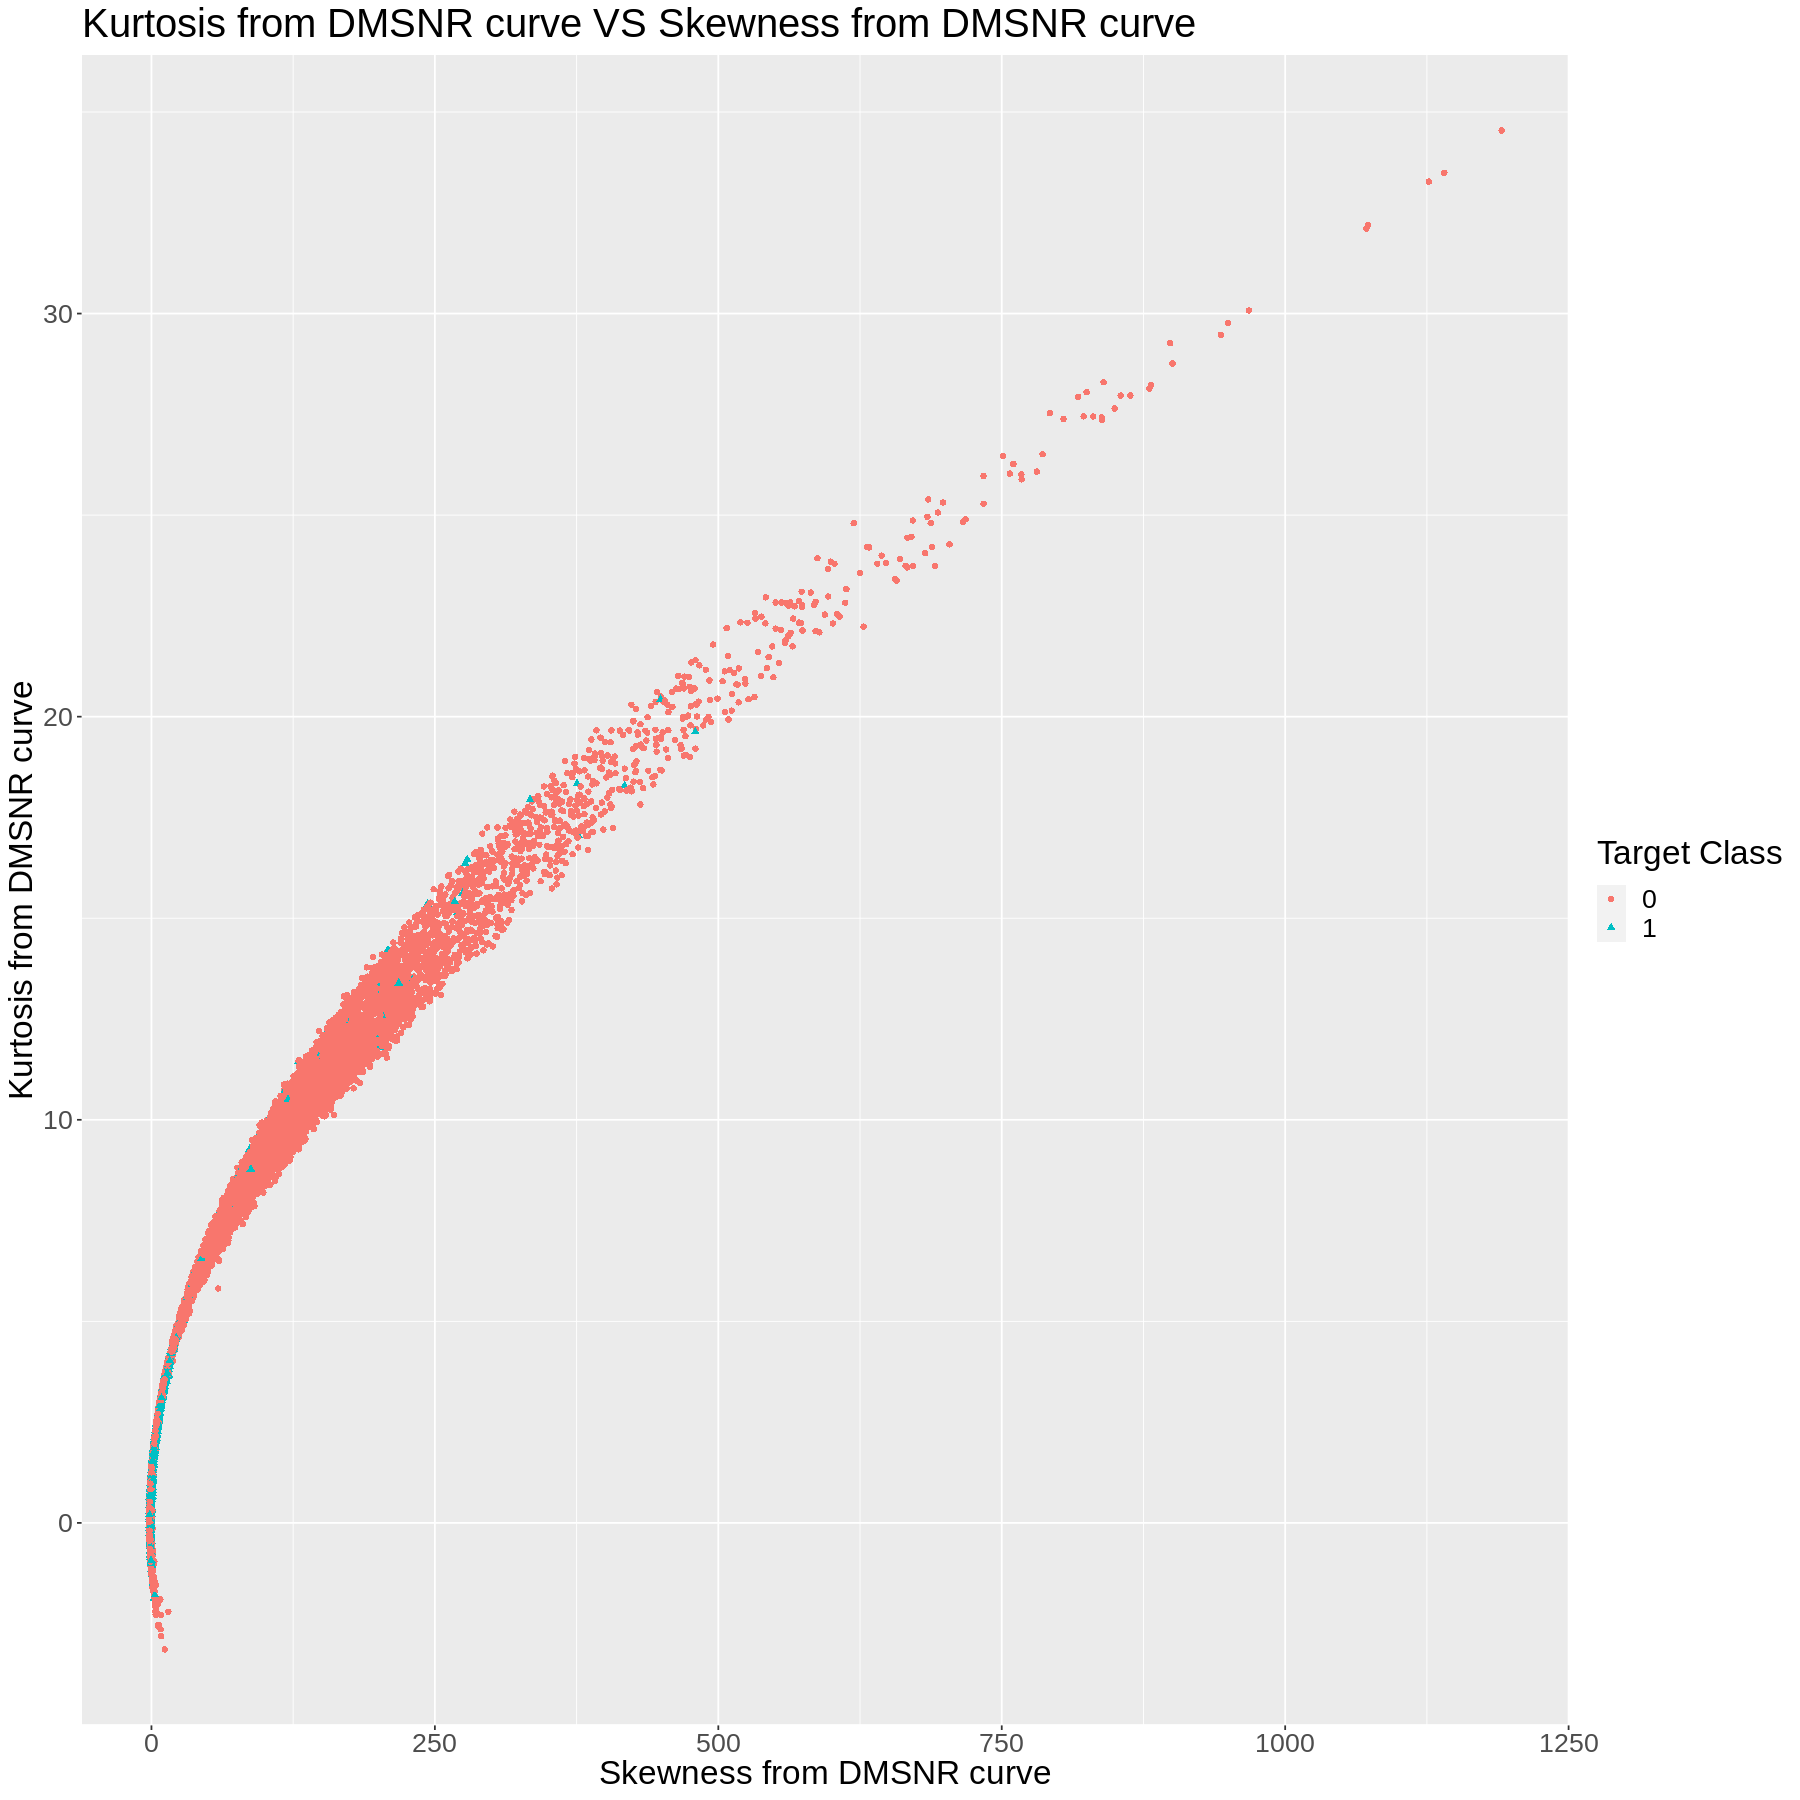

In [14]:
options(repr.plot.width = 15, repr.plot.height = 15)
DMSNR_plot_2 <- ggplot(pulsar_train_tidy, 
            aes(x = DMSNR_curve_skewness, y = DMSNR_curve_kurtosis, colour = target_class, shape = target_class))+
geom_point()+
ggtitle("Kurtosis from DMSNR curve VS Skewness from DMSNR curve")+
labs(x = "Skewness from DMSNR curve", y = "Kurtosis from DMSNR curve", colour = "Target Class", shape = "Target Class")+
theme(text = element_text(size = 20))
         DMSNR_plot_2             

## Section 3: Methods

In this project, we are trying to predict the unknown class of a star based on observed variables, the type of analysis required for this is classification. In the visualizations above, we plotted different variables of stars with a known class against each other to determine if they can be used as a predictor. In the graphs that plot integrated profile characteristics against each other, there are clear patterns that divide the two classes. The DM-SNR curve variables do not show as much of a clear divide between the non-pulsar and pulsar points as they both follow the same trend. Based on the plots, using only integrated profile variables as predictors will create a more accurate classifier. 

We will use the tidymodels K-nearest algorithm to perform our classification. The analysis will involve finding the best value of K using only the training data, by cross-validating a range of K values and picking the one with the highest accuracy. We have to be particularly careful with underfitting our model as this dataset has almost ten times as many non-pulsar observations than pulsar observations.

Once we have trained and tuned our model, we can use it to classify the testing data and see if it is able to accurately predict the classes. To represent the results from this classification, we can create a matrix that will show where the classes were being accurately or inaccurately predicted.


## Section 4: Expected outcomes and significance

We expect to see that our model will correctly predict the class of the testing data majority of the time. If our model is accurate, this could be used in future studies to help scientists identifies which are real pulsars more efficiently since a lot of detections of signals are actually caused by radio frequency interference (RFI) and noise, real signals from pulsars are sometimes hard to find[1]. However, our model might not produce the most accurate predictions, the porportion of real pulsar data is relatively small, future models could use datasets with more real pulsar data. 
